In [7]:
from sklearn import datasets, svm, metrics
mnist = datasets.load_digits()


In [15]:
mnist["data"].shape

(1797L, 64L)

In [16]:
mnist["target"].shape

(1797L,)

In [51]:
mnist["images"].shape
im= mnist["images"]
im[5]

array([[ 0.,  0., 12., 10.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 14., 16., 16., 14.,  0.,  0.],
       [ 0.,  0., 13., 16., 15., 10.,  1.,  0.],
       [ 0.,  0., 11., 16., 16.,  7.,  0.,  0.],
       [ 0.,  0.,  0.,  4.,  7., 16.,  7.,  0.],
       [ 0.,  0.,  0.,  0.,  4., 16.,  9.,  0.],
       [ 0.,  0.,  5.,  4., 12., 16.,  4.,  0.],
       [ 0.,  0.,  9., 16., 16., 10.,  0.,  0.]])

In [28]:
mnist_data = mnist["data"]
mnist_target = mnist["target"]

In [34]:
#Attribute Information: 8x8 image of integer pixels in the range 0..16.
mnist

{'DESCR': ".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of

In [30]:
type(mnist_data)

numpy.ndarray

In [31]:
import pandas as pd
mnist_data_df = pd.DataFrame(data = mnist_data)

In [32]:
mnist_data_df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [39]:
mnist_data_df.shape

(1797, 64)

In [38]:
mnist_target
mnist_target_df = pd.DataFrame(data = mnist_target)
mnist_target_df.shape

(1797, 1)

In [46]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_data_digit = mnist_data[5]
some_data_reshaped = some_data_digit.reshape(8,8)


In [48]:
type(some_data_digit)

numpy.ndarray

In [45]:
some_data_digit

array([ 0.,  0., 12., 10.,  0.,  0.,  0.,  0.,  0.,  0., 14., 16., 16.,
       14.,  0.,  0.,  0.,  0., 13., 16., 15., 10.,  1.,  0.,  0.,  0.,
       11., 16., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  4.,  7., 16.,  7.,
        0.,  0.,  0.,  0.,  0.,  4., 16.,  9.,  0.,  0.,  0.,  5.,  4.,
       12., 16.,  4.,  0.,  0.,  0.,  9., 16., 16., 10.,  0.,  0.])

In [47]:
some_data_reshaped

array([[ 0.,  0., 12., 10.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 14., 16., 16., 14.,  0.,  0.],
       [ 0.,  0., 13., 16., 15., 10.,  1.,  0.],
       [ 0.,  0., 11., 16., 16.,  7.,  0.,  0.],
       [ 0.,  0.,  0.,  4.,  7., 16.,  7.,  0.],
       [ 0.,  0.,  0.,  0.,  4., 16.,  9.,  0.],
       [ 0.,  0.,  5.,  4., 12., 16.,  4.,  0.],
       [ 0.,  0.,  9., 16., 16., 10.,  0.,  0.]])

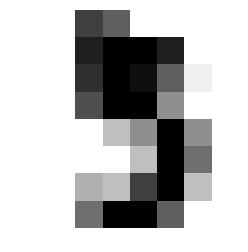

In [50]:
#plt.figure(1, figsize=(3, 3))
plt.axis("off")
plt.imshow(some_data_reshaped, cmap=plt.cm.binary, interpolation='nearest')
plt.show()

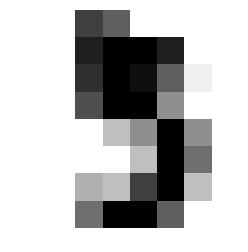

In [55]:
plt.axis("off")
plt.imshow(im[5], cmap=plt.cm.binary, interpolation='nearest')
plt.show()
#hence image reshaped data for 8 mutiply 8

In [53]:
mnist_target[5]

5

In [71]:
X_train, X_test, y_train, y_test = mnist_data[:1397], mnist_data[1397:],mnist_target[:1397],mnist_target[1397:],

In [72]:
import numpy as np
shuffle_index = np.random.permutation(1397)
print(shuffle_index)
len(shuffle_index)

[ 110 1157  897 ... 1385 1197  543]


1397

In [73]:
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [74]:
y_train_5 = (y_train == 5)

In [75]:
y_train_5

array([False, False, False, ..., False, False, False])

In [76]:
y_test_5 = (y_test == 5)

In [77]:
y_test_5.shape

(400L,)

In [78]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

c:\python27\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [80]:
sgd_clf.predict(some_data_reshaped)

ValueError: X has 8 features per sample; expecting 64